In [1]:
%load_ext autoreload
%autoreload 2

# Virtual Screening of ZINC Database

In [13]:
from openpharmacophore.screening.screening3D import VirtualScreening3D
from openpharmacophore.structured_based import StructuredBasedPharmacophore 

import copy

from rdkit import Chem, RDLogger
from rdkit.Chem import Draw
RDLogger.DisableLog('rdApp.*')

## Pharmacophore model for Plasmodium Falciparum Triosephosphate isomerase

ZINC database will be screened using an structured based pharmacophore obtained with pharmer for this protein whose pdb  id is 1M7O. 

In [4]:
sb_pharmacophore = StructuredBasedPharmacophore().from_file("../../data/Pharmacophores/pharmer/1M70.json")
sb_pharmacophore

StructuredBasedPharmacophore(n_elements: 5)

In [5]:
sb_pharmacophore.show()

NGLWidget()

# Screen ZINC with the pharmacophore model

In [6]:
zinc_screener = VirtualScreening3D(sb_pharmacophore)
zinc_screener.screen_ZINC(
                        download_path=None,
                        subset=None, 
                        mw_range=(250,300), 
                        logp_range=(1,2))

  0%|          | 0/31 [00:00<?, ?it/s]

Processing files...


  0%|          | 0/32 [00:00<?, ?it/s]

Finished screening ZINC database


In [7]:
zinc_screener.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                              819,817
Molecules matched to pharmacophore:                  67
Molecules that didn't match the pharmacophore:  819,750
Lowest  SSD value:     3.0941
Highest SSD value:     36.293
Average SSD value:    15.7605

Top 5 molecules:

ZINCID          SSD
-------       ------
2504543       3.0941
3193106       7.2743
1733876       7.7274
4900356       7.9954
2539631        8.669



In [8]:
zinc_screener.aligned_mols[0:3]

[(3.094051620458032, '2504543', <rdkit.Chem.rdchem.Mol at 0x7f957ad7cdf0>),
 (7.2743272524259766, '3193106', <rdkit.Chem.rdchem.Mol at 0x7f957ac8eb70>),
 (7.7273896294395, '1733876', <rdkit.Chem.rdchem.Mol at 0x7f957ac8ea30>)]

In [9]:
zinc_screener.save_results_to_file("./screen_results.csv")

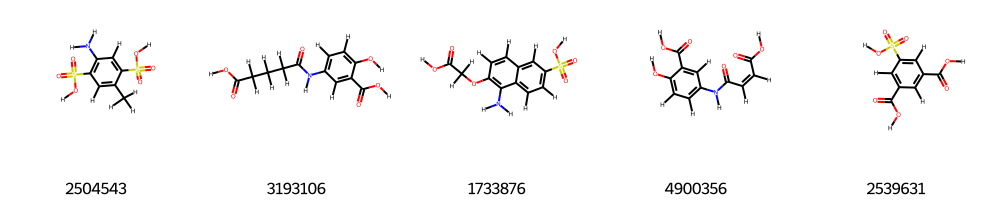

In [18]:
# Visualize top 5 molecules
top5 = [copy.deepcopy(mol[-1]) for mol in zinc_screener.aligned_mols[0:5]]
for molecule in top5:
    molecule.RemoveAllConformers()
img = Draw.MolsToGridImage(top5, molsPerRow=5, returnPNG=False, legends=[x.GetProp("_Name") for x in top5])
img